# Tarea Semanal 12

#### Por Joaquín López Tramullas
---------------------------------------------------------------

## Ejercicio 1

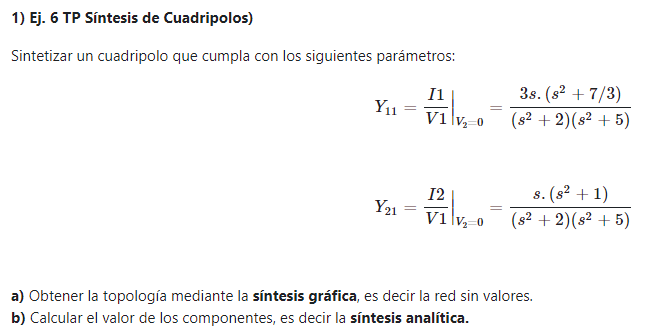

### Simulación simbólica

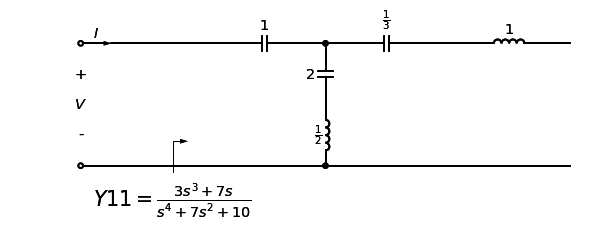

In [1]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor

s = sp.symbols('s ', complex=True)

Y11 = (3*s**3+7*s)/(s**4+7*s**2+10)
Z1 = 1/Y11

# Aplico remociones
omega_L2C2 = 1

Z2, Zrem_1 = tc2.remover_polo_dc(Z1, omega_zero = omega_L2C2 )
Y2 = 1/Z2

Y4 , Yrem_2, L2, C2 = tc2.remover_polo_jw(Y2, isImpedance = False, omega = omega_L2C2 ) 
Z4 = 1/Y4

Z6, Zrem_4 = tc2.remover_polo_dc(Z4)

Z8, Zrem_6 = tc2.remover_polo_infinito(Z6)

# Calculo componentes
C1 = 1/(s*Zrem_1)
C3 = 1/(s*Zrem_4)
L3 = Zrem_6/s
      
# Dibujamos la red resultante
d = Drawing(unit=4)

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Y11',  
                                          Y11, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Capacitor, C1)
d = tc2.dibujar_tanque_derivacion(d, L2, C2)
d = tc2.dibujar_elemento_serie(d, Capacitor, C3)
d = tc2.dibujar_elemento_serie(d, Inductor, L3)
display(d)

### Simulación circuital

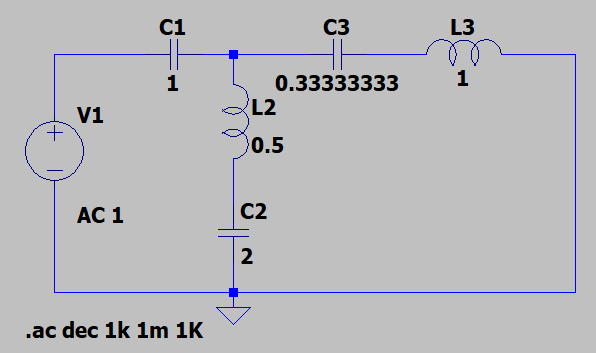

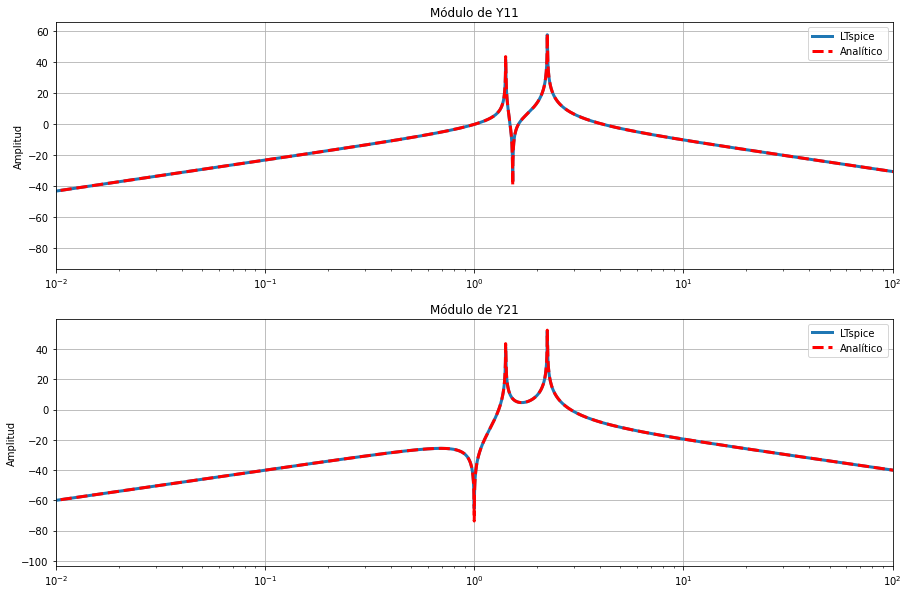

In [2]:
import ltspice
import matplotlib.pyplot as plt
import scipy.signal as sig
import sympy as sim
import numpy as np

l = ltspice.Ltspice("./Simulaciones/Ej1.raw")
l.parse()

# Obtengo curvas de simulación en ltspice
freq = l.get_frequency()
Y11 =l.get_data('I(V1)')
Y21 =l.get_data('I(L3)')

# Calculo amplitud y fase de Y11 e Y21
Y11_amplitude = 20 * np.log10(np.abs(Y11))
Y21_amplitude = 20 * np.log10(np.abs(Y21))
Y11_angle = np.unwrap(np.angle(Y11))-np.pi
Y11_angle = np.unwrap(np.angle(Y11))-np.pi

# Defino num y den de Y11 e Y21 
Y11_num = [3,0,7,0]
Y11_den = [1,0,7,0,10]

Y21_num = [1,0,1,0]
Y21_den = [1,0,7,0,10]

# Obtengo Y11(s) e Y21(s)
w, F_11 = sig.freqs(Y11_num,Y11_den,freq*2*np.pi)
w, F_21 = sig.freqs(Y21_num,Y21_den,freq*2*np.pi)

# Ploteo
plt.close('all')
fig, axes = plt.subplots(2, 1, figsize=(15,10))

axes[0].semilogx(freq*2*np.pi, Y11_amplitude, linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(F_11)), 'r--', linewidth=3.0, label='Analítico')
axes[0].set_title("Módulo de Y11")
axes[0].set_ylabel("Amplitud")
axes[0].set_xlim([0.01,100])
axes[0].legend()
axes[0].grid()

axes[1].semilogx(freq*2*np.pi, Y21_amplitude, linewidth=3.0, label='LTspice')
axes[1].semilogx(w, 20*np.log10(np.abs(F_21)), 'r--', linewidth=3.0, label='Analítico')
axes[1].set_title("Módulo de Y21")
axes[1].set_ylabel("Amplitud")
axes[1].set_xlim([0.01,100])
axes[1].legend()
axes[1].grid()

## Ejejercicio 2

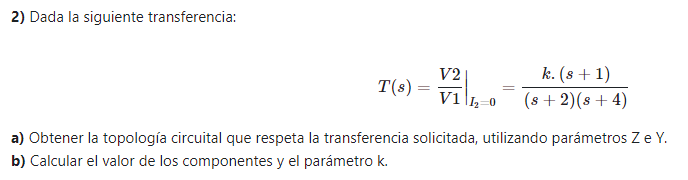

### Simulación simbólica (Z11)

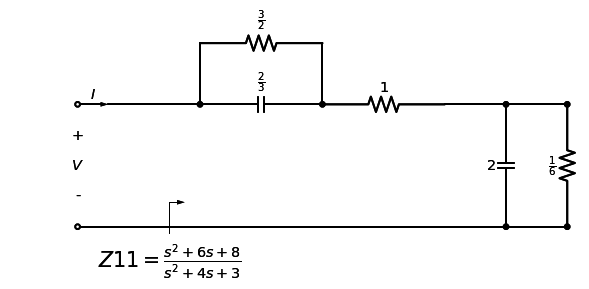

In [3]:
Z11 = (s**2+6*s+8)/(s**2+4*s+3)

# Aplico remociones

# Remuevo polo en -1 a Z11
sigma = 1
Z2, Zrem_1, R1, C1 = tc2.remover_polo_sigma(Z11, sigma, isImpedance = True,  isRC = True) 

# Remuevo valor constante en infinito a Z2
Z4, Zrem_2 = tc2.remover_valor_en_infinito(Z2)

Y4 = 1 /Z4

# Remuevo polo en infinito a Y4
Y6, Yrem_4 = tc2.remover_polo_infinito(Y4)

# Calculo componentes
R2 = Zrem_2 
C3 = Yrem_4/s
R3 = 1/Y6

# Dibujamos la red resultante
d = Drawing(unit=4)

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z11',  
                                          Z11, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_tanque_RC_serie(d, R1, C1)
d = tc2.dibujar_elemento_serie(d, Resistor, R2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_derivacion(d, Capacitor, C3)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_derivacion(d, Resistor, R3)
display(d)

### Simulación circuital (Z11)

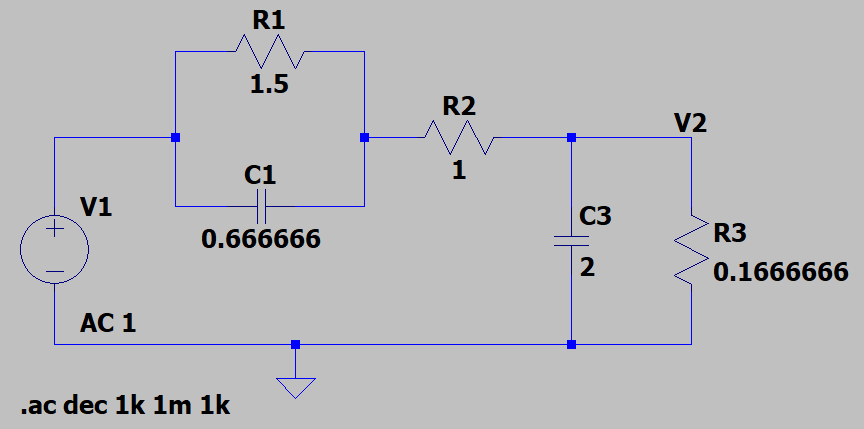

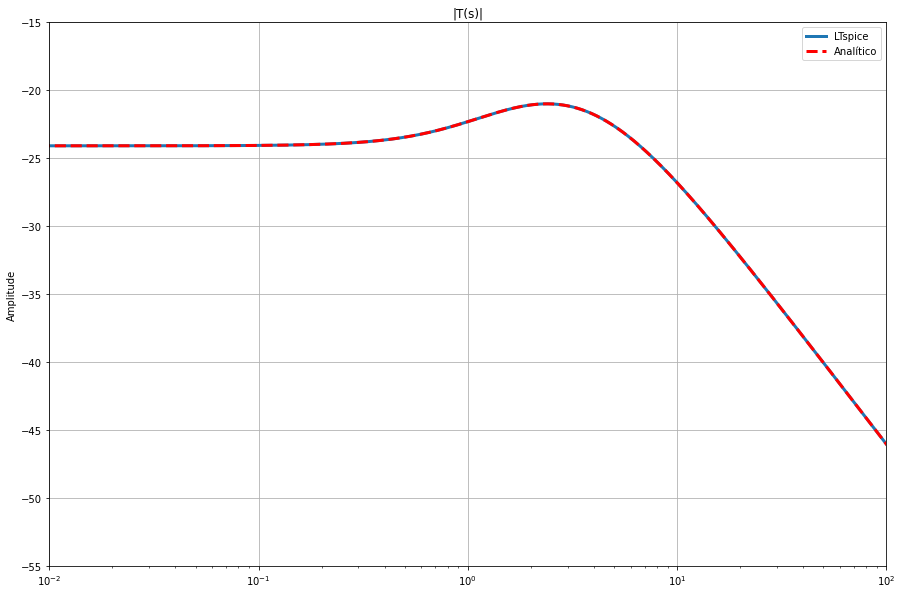

In [4]:
l = ltspice.Ltspice("./Simulaciones/Ej2_Z11.raw")
l.parse()

# Obtengo curvas de simulación en ltspice
freq = l.get_frequency()
T =l.get_data('V(V2)')

# Calculo |T(s)|
T_amplitude = 20 * np.log10(np.abs(T))

# Defino num y den de T(s)
T_num = [0.5, 0.5]
T_den = [1,6,8]

# Obtengo T(s)
w, T_s = sig.freqs(T_num,T_den,freq*2*np.pi)

# Ploteo
plt.close('all')
fig, axes = plt.subplots(1, 1, figsize=(15,10))

axes.semilogx(freq*2*np.pi, T_amplitude, linewidth=3.0, label='LTspice')
axes.semilogx(w, 20*np.log10(np.abs(T_s)), 'r--', linewidth=3.0, label='Analítico')
axes.set_title("|T(s)|")
axes.set_ylabel("Amplitude")
axes.set_xlim([0.01,100])
axes.set_ylim([-55,-15])
axes.legend()
axes.grid()

### Simulación simbólica (Y2)

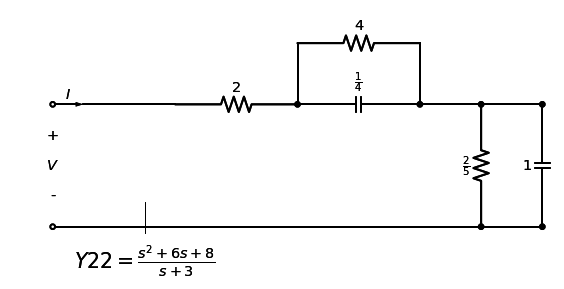

In [5]:
Y22 = (s**2+6*s+8)/(s+3)

# Aplico remociones

# Remuevo polo en infinito a Y22
Y2, Yrem_1 = tc2.remover_polo_infinito(Y22)
 
# Remuevo parcialmente valor constante en 0 a Y2
ubic_zero = 1
Y4,Yrem_2 = tc2.remover_valor(Y2, ubic_zero)    

Z4 = 1/Y4

# Remuevo a z4 polo en w = 1
sigma = 1
Z6 , Yrem_4, R2, C2 = tc2.remover_polo_sigma(Z4, sigma, isImpedance = True,  isRC = True) 

# Calculo componentes
C1 = Yrem_1/s
R1 = 1/ Yrem_2
R3 = Z6
      
# Dibujamos la red resultante
d = Drawing(unit=4)

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Y22',  
                                          Y22, 
                                          hacia_salida = False,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Resistor, R3)
d = tc2.dibujar_tanque_RC_serie(d, R2, C2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_derivacion(d, Resistor, R1)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)
display(d)

### Simulación circuital (Y22)

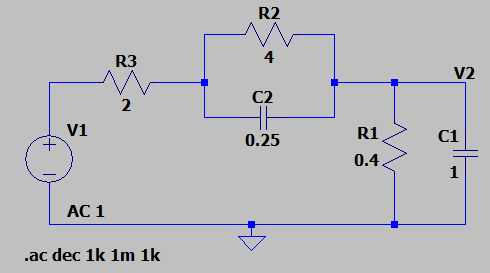

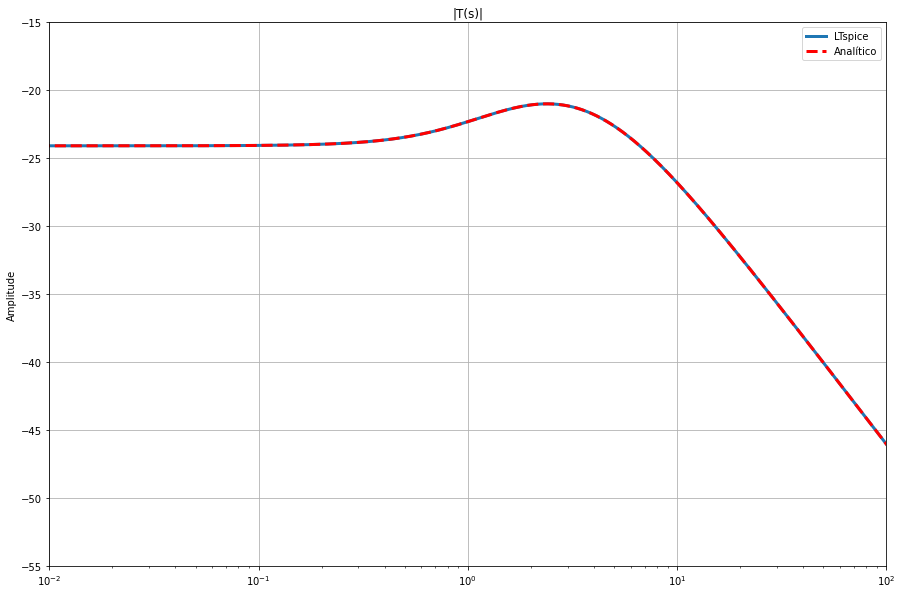

In [6]:
l = ltspice.Ltspice("./Simulaciones/Ej2_Y22.raw")
l.parse()

# Obtengo curvas de simulación en ltspice
freq = l.get_frequency()
T =l.get_data('V(V2)')

# Calculo |T(s)|
T_amplitude = 20 * np.log10(np.abs(T))

# Defino num y den de T(s)
T_num = [0.5, 0.5]
T_den = [1,6,8]

# Obtengo T(s)
w, T_s = sig.freqs(T_num,T_den,freq*2*np.pi)

# Ploteo
plt.close('all')
fig, axes = plt.subplots(1, 1, figsize=(15,10))

axes.semilogx(freq*2*np.pi, T_amplitude, linewidth=3.0, label='LTspice')
axes.semilogx(w, 20*np.log10(np.abs(T_s)), 'r--', linewidth=3.0, label='Analítico')
axes.set_title("|T(s)|")
axes.set_ylabel("Amplitude")
axes.set_xlim([0.01,100])
axes.set_ylim([-55,-15])
axes.legend()
axes.grid()